Name: Justin Wong Juin Hng
Admin Number: p2112646


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('food_nutrition.csv')
display(df)

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,"Turkey, all classes, wing, meat and skin, raw",20.22,12.32,0.00,0.00,0.0,3
1,Fruits and Fruit Juices,"Pears, raw, green anjou",0.44,0.10,15.79,9.73,3.1,1
2,Fruits and Fruit Juices,"Maraschino cherries, canned, drained",0.22,0.21,41.97,38.77,3.2,2
3,Poultry Products,"Chicken, stewing, meat only, cooked, stewed",30.42,11.89,0.00,0.00,0.0,34
4,Breakfast Cereals,"Cereals ready-to-eat, wheat and bran, presweet...",7.10,5.60,76.20,23.60,9.7,410
...,...,...,...,...,...,...,...,...
229,Breakfast Cereals,"Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...",8.30,4.09,81.40,21.20,8.7,502
230,Breakfast Cereals,"Cereals ready-to-eat, POST, HONEY BUNCHES OF O...",7.00,5.40,82.00,21.90,5.2,748
231,Vegetables and Vegetable Products,"Squash, winter, all varieties, cooked, baked, ...",0.89,0.35,8.85,3.30,2.8,261
232,Breakfast Cereals,"Cereals ready-to-eat, GENERAL MILLS, Berry Bur...",8.80,4.50,80.50,27.00,7.6,549


In [77]:
# microgram to gram
df['VitA_mcg'] = df['VitA_mcg']*(10**-6)
num_df = df.drop(columns=['Type','Description'],axis=1)
plot_df = df.drop(columns=['Description'],axis=1)
unscaled_plot = plot_df.copy()
unscaled_num = num_df.copy()
display(df.head())

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,"Turkey, all classes, wing, meat and skin, raw",20.22,12.32,0.00,0.00,0.0,0.000003
1,Fruits and Fruit Juices,"Pears, raw, green anjou",0.44,0.10,15.79,9.73,3.1,0.000001
2,Fruits and Fruit Juices,"Maraschino cherries, canned, drained",0.22,0.21,41.97,38.77,3.2,0.000002
3,Poultry Products,"Chicken, stewing, meat only, cooked, stewed",30.42,11.89,0.00,0.00,0.0,0.000034
4,Breakfast Cereals,"Cereals ready-to-eat, wheat and bran, presweet...",7.10,5.60,76.20,23.60,9.7,0.000410


In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(num_df)
pca_samples = pca.transform(num_df)

# Create dataframe for centred scores
scores_centred = pd.DataFrame(pca_samples, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [79]:
def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue'])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # PCA cum explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

pca_results = pca_results(num_df, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
PC 1,1175.2400,0.8728,0.8728,-0.0855,-0.0455,0.9334,0.3316,0.0965,0.0
PC 2,122.4192,0.0909,0.9638,0.8337,0.5222,0.1422,-0.1064,-0.0248,0.0
PC 3,31.8713,0.0237,0.9874,0.0775,0.1348,-0.2937,0.9224,-0.1970,-0.0
PC 4,9.5024,0.0071,0.9945,-0.5368,0.8153,0.0454,-0.0997,-0.1874,0.0
PC 5,7.4346,0.0055,1.0000,-0.0589,0.2055,-0.1420,0.1341,0.9572,-0.0
PC 6,0.0000,0.0000,1.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,1.0


<Figure size 432x288 with 0 Axes>

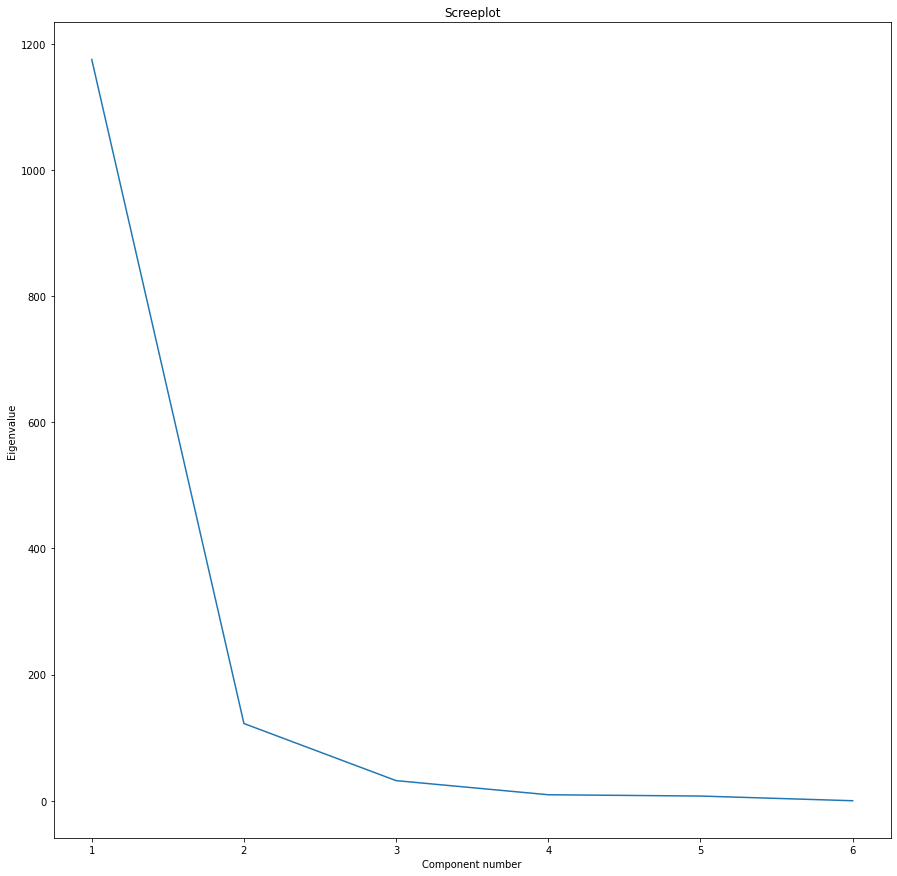

In [80]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

<Figure size 432x288 with 0 Axes>

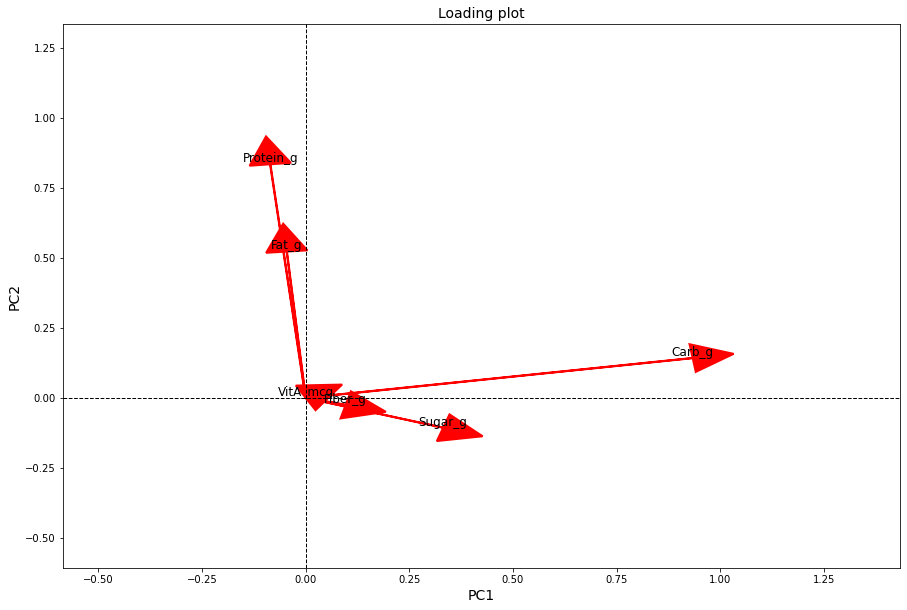

PCA(n_components=2)


In [87]:
# loading graph pca
load = PCA(n_components=2).fit(num_df)
load_score = load.transform(num_df)
def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.02

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

plt.clf()

ax5 = loadingplot(num_df, load, width=15, height=10)
plt.show()


<Figure size 432x288 with 0 Axes>

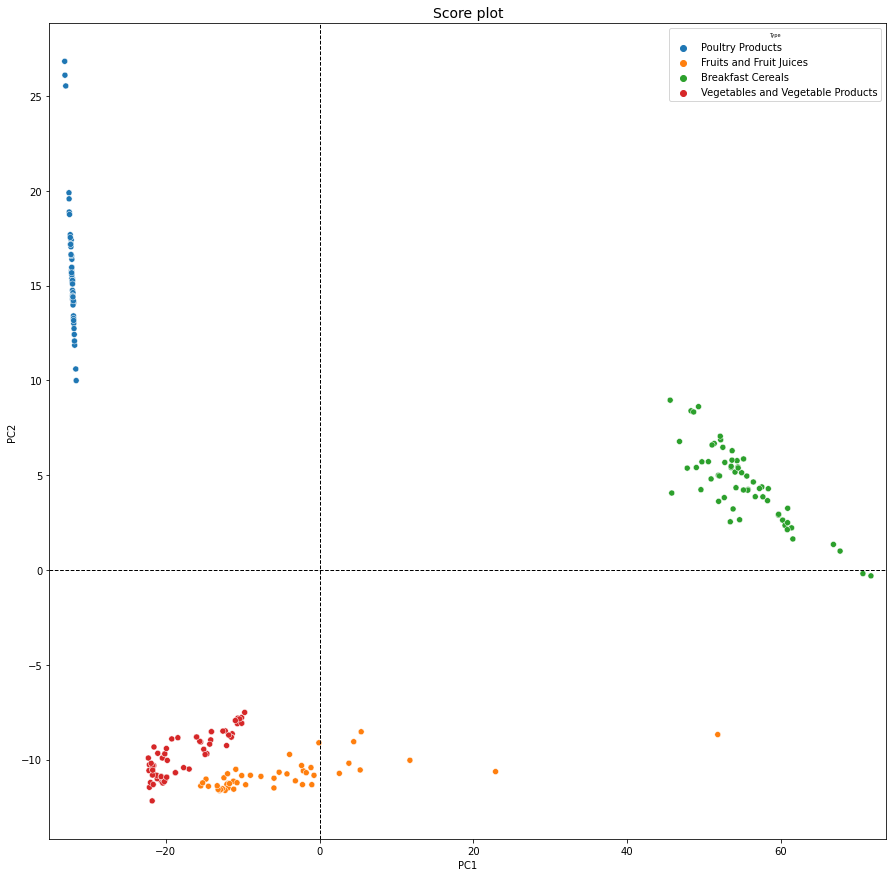

In [82]:
def scoreplot_label(data, scores, pca, width=15, height=15, margin=2):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data['Type'])
    plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='5') # for legend title

    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf()
ax3= scoreplot_label(plot_df,scores_centred,pca)
plt.show()

In [83]:
pca = PCA(n_components=2).fit(num_df)
pca_samples = pca.transform(num_df)
scores = pd.DataFrame(pca_samples,columns=['PC1','PC2'])
display(scores)

def scoreplot_label(data, scores, pca, x, y,width=10, height=10, margin=0.5,):
    x-=1
    y-=1
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x=x, y=y, data = scores, style=data['Type'], hue=data['Type'])

    #Set limits for figure
    x_min = min(scores[x].min(),0)-margin
    x_max = max(scores[x].max(),0)+margin
    y_min = min(scores[y].min(),0)-margin
    y_max = max(scores[y].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

,PC1,PC2
0,-31.720164,10.606624
1,-11.208149,-11.133683
2,22.883885,-10.629392
3,-32.572315,18.886152
4,49.598589,4.240424
...,...,...
229,53.526222,5.471701
230,54.032096,5.169688
231,-19.897535,-10.923131
232,54.442105,5.385053


In [84]:
# stitch unidentified cultivator
unidentified = pd.DataFrame({'Type':['Unknown'],'Protein_g':[0.3],'Fat_g':[0.1],'Carb_g':[19.6],'Sugar_g':[16.7],'Fiber_g':[2.9],'VitA_mcg':[0.000002]})

unidentified_plot = pd.concat([unscaled_plot,unidentified],ignore_index=True)
display(unidentified_plot.head())

unidentified = unidentified.drop(columns=['Type'],axis=1)

unidentified_num = pd.concat([unscaled_num,unidentified],ignore_index=True)

display(unidentified_num.head())

,Type,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,20.22,12.32,0.00,0.00,0.0,0.000003
1,Fruits and Fruit Juices,0.44,0.10,15.79,9.73,3.1,0.000001
2,Fruits and Fruit Juices,0.22,0.21,41.97,38.77,3.2,0.000002
3,Poultry Products,30.42,11.89,0.00,0.00,0.0,0.000034
4,Breakfast Cereals,7.10,5.60,76.20,23.60,9.7,0.000410


,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,20.22,12.32,0.00,0.00,0.0,0.000003
1,0.44,0.10,15.79,9.73,3.1,0.000001
2,0.22,0.21,41.97,38.77,3.2,0.000002
3,30.42,11.89,0.00,0.00,0.0,0.000034
4,7.10,5.60,76.20,23.60,9.7,0.000410


In [85]:
pca_samples = pca.transform(unidentified_num)
scores = pd.DataFrame(pca_samples)
display(scores)

,0,1
0,-31.720164,10.606624
1,-11.208149,-11.133683
2,22.883885,-10.629392
3,-32.572315,18.886152
4,49.598589,4.240424
...,...,...
230,54.032096,5.169688
231,-19.897535,-10.923131
232,54.442105,5.385053
233,52.450433,6.473975


Text(0, 0.5, 'PCA 2')

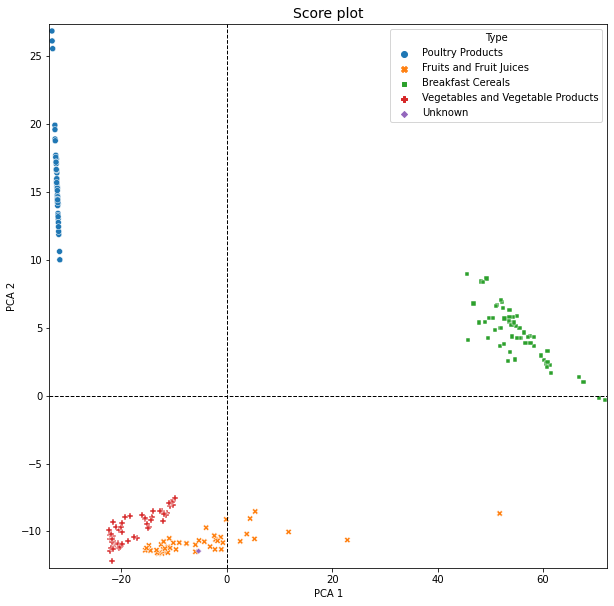

In [86]:
ax4 = scoreplot_label(unidentified_plot, scores, pca,1,2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")